<a href="https://colab.research.google.com/github/akipips/kaggle/blob/master/house_price/EDA/beginner_s_stop_xgb_lgbm_blend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A very simple XGB Regression Example for Beginners !



![](https://marsrealty.co.nz/wp-content/uploads/2018/10/sold-1000x500.jpeg)

### Start here if...

You have some experience with R or Python and machine learning basics. This is a perfect competition for data science students who have completed an online course in machine learning and are looking to expand their skill set before trying a featured competition. 

### Competition Description

![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### Practice Skills

- Creative feature engineering 
- Advanced regression techniques like random forest and gradient boosting

At the end of the notebook, some intro on yellowbricks!

# Imports

In [ ]:
import os
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

%matplotlib inline

# Getting the data

In [ ]:
train = pd.read_csv('/content/train.csv')
test  = pd.read_csv('/content/test.csv')
sample= pd.read_csv('/content/sample_submission.csv')

In [ ]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

# train and target

In [ ]:
y     = train[['Id','SalePrice']]
train_d=train
train = train.drop('SalePrice',axis=1)

In [ ]:
all_dfs = [train,test]
all_df = pd.concat(all_dfs).reset_index(drop=True);
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,

In [ ]:
display_all(all_df.isnull().sum()/all_df.shape[0])#all_df.shape[0]=2919
#欠損値の割合

Id               0.000000
MSSubClass       0.000000
MSZoning         0.001370
LotFrontage      0.166495
LotArea          0.000000
Street           0.000000
Alley            0.932169
LotShape         0.000000
LandContour      0.000000
Utilities        0.000685
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000343
Exterior2nd      0.000343
MasVnrType       0.008222
MasVnrArea       0.007879
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.027749
BsmtCond         0.028092
BsmtExposure     0.028092
BsmtFinType1     0.027064
BsmtFinSF1       0.000343
BsmtFinType2     0.027407
BsmtFinSF2       0.000343
BsmtUnfSF        0.000343
TotalBsmtSF 

# don't really know what to do with these!
欠損値多すぎだから捨てる

In [ ]:
all_df.drop(['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'],axis=1,inplace=True)#alley路地アクセスのタイプ misc他のカテゴリでカバーされていないその他の機能

# let's fill the Na with specific values!

In [ ]:
def describe_object(df,col_name):
  print("カラム名:{}".format(col_name))
  print("{}個の値があります。".format(df[col_name].nunique()))
  print("詳細")
  print(df[col_name].value_counts(dropna=False,normalize=True))
  fig, ax = plt.subplots(figsize=(14,7))
  plt.xticks(rotation=90);
  if df[col_name].dtype!="float64" or  df[col_name].dtype!="int64":
    sns.swarmplot(x=col_name, y="SalePrice",data=df,ax=ax)
  else:
    df.plot.scatter(x=col_name, y='SalePrice')

カラム名:BsmtCond
4個の値があります。
詳細
TA     0.897945
Gd     0.044521
Fa     0.030822
NaN    0.025342
Po     0.001370
Name: BsmtCond, dtype: float64


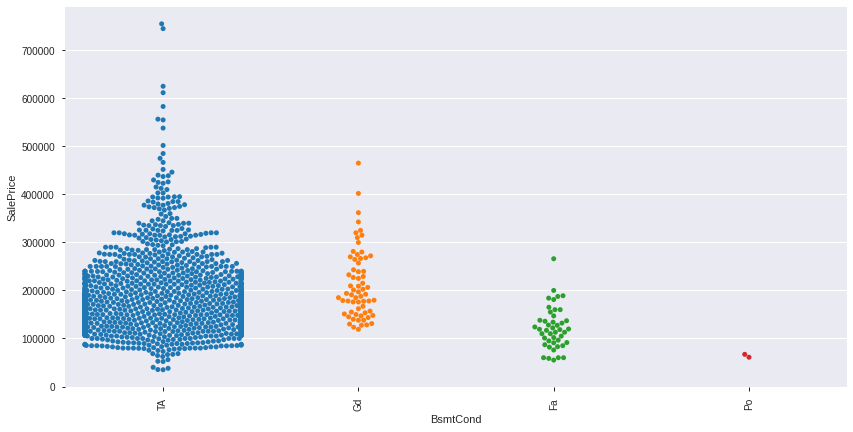

In [ ]:
describe_object(train_d,"BsmtCond")

In [ ]:
train_d["BsmtCond"].dtype

dtype('O')

In [ ]:
all_df['LotFrontage'].fillna(value=all_df['LotFrontage'].median(),inplace=True)
all_df['MasVnrType'].fillna(value='None',inplace=True)
all_df['MasVnrArea'].fillna(0,inplace=True)
all_df['BsmtCond'].fillna(value='TA',inplace=True)
all_df['BsmtExposure'].fillna(value='No',inplace=True)
all_df['Electrical'].fillna(value='SBrkr',inplace=True)
all_df['BsmtFinType2'].fillna(value='Unf',inplace=True)
all_df['GarageType'].fillna(value='Attchd',inplace=True)
all_df['GarageYrBlt'].fillna(value=all_df['GarageYrBlt'].median(),inplace=True)
all_df['GarageFinish'].fillna(value='Unf',inplace=True)
all_df['GarageQual'].fillna(value='TA',inplace=True)
all_df['GarageCond'].fillna(value='TA',inplace=True)
all_df['BsmtFinType1'].fillna(value='NO',inplace=True)
all_df['BsmtQual'].fillna(value='No',inplace=True)
all_df['BsmtFullBath'].fillna(value=all_df['BsmtFullBath'].median(),inplace=True)
all_df['BsmtFinSF1'].fillna(value=all_df['BsmtFinSF1'].median(),inplace=True)
all_df['BsmtFinSF2'].fillna(value=0,inplace=True)
all_df['BsmtUnfSF'].fillna(value=0,inplace=True)
all_df['TotalBsmtSF'].fillna(value=all_df['TotalBsmtSF'].median(),inplace=True)
all_df['BsmtHalfBath'].fillna(value=0,inplace=True)
all_df['GarageCars'].fillna(value=all_df['GarageCars'].median(),inplace=True)
all_df['GarageArea'].fillna(value=all_df['GarageArea'].median(),inplace=True)

# gotta encode all the object types! 

In [ ]:
labelencoder=LabelEncoder()#分類器にかける前に文字データを離散の数値に変換するときに使われる。

all_df['MSZoning']      = labelencoder.fit_transform(all_df['MSZoning'].astype(str))
all_df['Exterior1st']   = labelencoder.fit_transform(all_df['Exterior1st'].astype(str))
all_df['Exterior2nd']   = labelencoder.fit_transform(all_df['Exterior2nd'].astype(str))
all_df['KitchenQual']   = labelencoder.fit_transform(all_df['KitchenQual'].astype(str))
all_df['Functional']    = labelencoder.fit_transform(all_df['Functional'].astype(str))
all_df['SaleType']      = labelencoder.fit_transform(all_df['SaleType'].astype(str))
all_df['Street']        = labelencoder.fit_transform(all_df['Street'])   
all_df['LotShape']      = labelencoder.fit_transform(all_df['LotShape'])   
all_df['LandContour']   = labelencoder.fit_transform(all_df['LandContour'])   
all_df['LotConfig']     = labelencoder.fit_transform(all_df['LotConfig'])   
all_df['LandSlope']     = labelencoder.fit_transform(all_df['LandSlope'])   
all_df['Neighborhood']  = labelencoder.fit_transform(all_df['Neighborhood'])   
all_df['Condition1']    = labelencoder.fit_transform(all_df['Condition1'])   
all_df['Condition2']    = labelencoder.fit_transform(all_df['Condition2'])   
all_df['BldgType']      = labelencoder.fit_transform(all_df['BldgType'])   
all_df['HouseStyle']    = labelencoder.fit_transform(all_df['HouseStyle'])   
all_df['RoofStyle']     = labelencoder.fit_transform(all_df['RoofStyle'])   
all_df['RoofMatl']      = labelencoder.fit_transform(all_df['RoofMatl'])    
all_df['MasVnrType']    = labelencoder.fit_transform(all_df['MasVnrType'])   
all_df['ExterQual']     = labelencoder.fit_transform(all_df['ExterQual'])  
all_df['ExterCond']     = labelencoder.fit_transform(all_df['ExterCond'])   
all_df['Foundation']    = labelencoder.fit_transform(all_df['Foundation'])   
all_df['BsmtQual']      = labelencoder.fit_transform(all_df['BsmtQual'])   
all_df['BsmtCond']      = labelencoder.fit_transform(all_df['BsmtCond'])   
all_df['BsmtExposure']  = labelencoder.fit_transform(all_df['BsmtExposure'])   
all_df['BsmtFinType1']  = labelencoder.fit_transform(all_df['BsmtFinType1'])   
all_df['BsmtFinType2']  = labelencoder.fit_transform(all_df['BsmtFinType2'])   
all_df['Heating']       = labelencoder.fit_transform(all_df['Heating'])   
all_df['HeatingQC']     = labelencoder.fit_transform(all_df['HeatingQC'])   
all_df['CentralAir']    = labelencoder.fit_transform(all_df['CentralAir'])   
all_df['Electrical']    = labelencoder.fit_transform(all_df['Electrical'])    
all_df['GarageType']    = labelencoder.fit_transform(all_df['GarageType'])  
all_df['GarageFinish']  = labelencoder.fit_transform(all_df['GarageFinish'])   
all_df['GarageQual']    = labelencoder.fit_transform(all_df['GarageQual'])  
all_df['GarageCond']    = labelencoder.fit_transform(all_df['GarageCond'])   
all_df['PavedDrive']    = labelencoder.fit_transform(all_df['PavedDrive'])  
all_df['SaleCondition'] = labelencoder.fit_transform(all_df['SaleCondition'])  

# need to scale in case we want to use linear models

In [ ]:
Scaler = StandardScaler()
all_scaled = pd.DataFrame(Scaler.fit_transform(all_df))

train_scaled = pd.DataFrame(all_scaled[:1460])
test_scaled = pd.DataFrame(all_scaled[1460:2920])

# train - test split !

In [ ]:
X = train_scaled
X_train, X_test, y_train, y_test = train_test_split(X, y['SalePrice'], test_size=0.1, random_state=42)

# XGBoost

In [ ]:
from xgboost import XGBRegressor
XGB = XGBRegressor(max_depth=3,learning_rate=0.1,n_estimators=1000,reg_alpha=0.001,reg_lambda=0.000001,n_jobs=-1,min_child_weight=3)
XGB.fit(X_train,y_train)

[04:07:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=3, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.001, reg_lambda=1e-06, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# Light GBM

In [ ]:
from lightgbm import LGBMRegressor
LGBM = LGBMRegressor(n_estimators = 1000)
LGBM.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# our scores

In [ ]:
print ("Training score:",XGB.score(X_train,y_train),"Test Score:",XGB.score(X_test,y_test))
print ("Training score:",LGBM.score(X_train,y_train),"Test Score:",LGBM.score(X_test,y_test))

Training score: 0.9984383142362594 Test Score: 0.9360790407423961
Training score: 0.9999557727264998 Test Score: 0.9101390980189892


# blend 50% + 50%

In [ ]:
y_pred_xgb  = pd.DataFrame( XGB.predict(test_scaled))
y_pred_lgbm = pd.DataFrame(LGBM.predict(test_scaled))

y_pred=pd.DataFrame()
print(y_pred_xgb[0])
y_pred['SalePrice'] = 0.5 * y_pred_xgb[0] + 0.5 * y_pred_lgbm[0]
y_pred['Id'] = test['Id']

0       125315.906250
1       165793.921875
2       186912.890625
3       194728.187500
4       180436.968750
            ...      
1454     75599.414062
1455     78360.882812
1456    181291.609375
1457    117402.601562
1458    229654.265625
Name: 0, Length: 1459, dtype: float32


# finally the submission

In [ ]:
y_pred.to_csv('house_price_blend.csv',index=False)

# Some Regression Visuals to help us understand the current state!

In [ ]:
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from yellowbrick.model_selection import ValidationCurve

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


[04:13:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ResidualsPlot(alpha=0.75,
              ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7321e294e0>,
              hist=True, line_color=None, model=None, test_color=None,
              train_color=None)

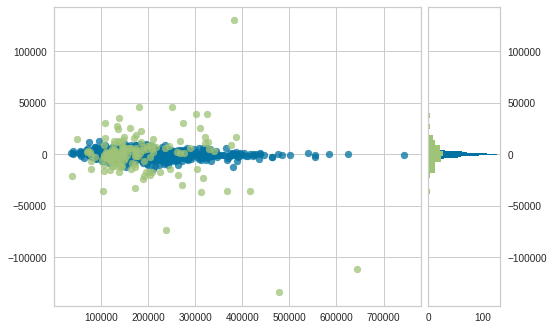

In [ ]:
visualizer = ResidualsPlot(XGB)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
visualizer

0.8495537369561037

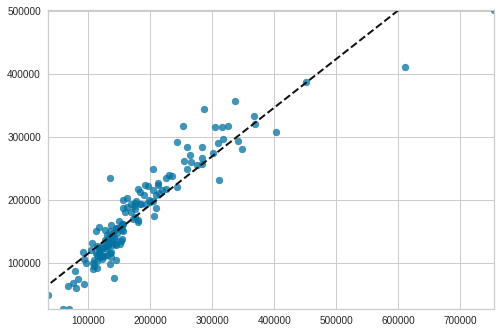

In [ ]:
model = Lasso(alpha=10)
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
                 


## thanks a lot for your time! I'm trying to keep this notebook in a neat way to help the beginners! Though I'm planning to add some simple EDA blocks as well.

### I'm a big fan of Yellowbricks: Machine Learning Visualization library (especially their regression visualisation tools)

### You can find additional information through its website: https://www.scikit-yb.org/en/latest/

![](https://www.scikit-yb.org/en/latest/_images/banner.png)

Please upvote if you like it!